In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Comparing Importance Sampling with Accept-Reject

### Theorem 3.12
Theorem 3.12 formally addresses the comparison between Accept-Reject and importance sampling methods. With the exception of constant functions $ h(x) = h_0 $, the optimal instrumental density $ g^* $ is always different from the target density $ f $.

### Practical Considerations
While Theorem 3.12 provides theoretical insights, its practical applicability is limited for the following reasons:
- **Dependence on $ h(x) $:** The prescribed instrumental density $ g^* $ depends on the function $ h $ of interest. This dependence:
  - May significantly increase computation time for every new function $ h $.
  - Prevents the reuse of the generated sample for estimating multiple quantities, as illustrated in Example 3.14.
  
### Accept-Reject as a Practical Alternative
When the Accept-Reject method is implemented with a density $ g $ satisfying 
$$
f(x) \leq M g(x), \quad \text{for a constant } 1 < M < \infty,
$$
the following points arise:
1. **Dual Utility of $ g $:** The density $ g $ can serve as the instrumental density for importance sampling.
2. **Bounded Importance Weight:** Since $ f/g $ is bounded, the variance of the importance sampling estimator is finite.
3. **Subsample Creation:** In the Accept-Reject method, the resulting sample $ X_1, X_2, \ldots, X_n $ is a subsample of $ Y_1, Y_2, \ldots $, where:
   - $ Y_i $ are simulated from $ g $.
   - $ T $ is the random number of simulations from $ g $ required to produce $ n $ variables from $ f $.

### Notes
This section contains specialized material and may be omitted on a first reading.

## Comparison of Estimation Using Accept-Reject and Importance Sampling

### Traditional Estimators
To compare estimation methods using Accept-Reject and importance sampling, consider the two traditional estimators:

#### Estimator $ \delta_1 $:
$$
\delta_1 = \frac{1}{n} \sum_{i=1}^n h(X_i),
$$
where $ X_i $ are the accepted samples from the Accept-Reject algorithm.

#### Estimator $ \delta_2 $:
$$
\delta_2 = \frac{1}{t} \sum_{j=1}^t h(Y_j) \frac{f(Y_j)}{g(Y_j)},
$$
where $ Y_j $ are all the samples (both accepted and rejected) from the Accept-Reject algorithm, and $ t $ is the total number of samples generated.

If the ratio $ f/g $ is only known up to a constant, $ \delta_2 $ can be modified to:
$$
\delta_2^* = \frac{\sum_{j=1}^t h(Y_j) \frac{f(Y_j)}{g(Y_j)}}{\sum_{j=1}^t \frac{f(Y_j)}{g(Y_j)}}.
$$

### Expanded Form of $ \delta_2 $
Writing $ \delta_2 $ in a more explicit form:
$$
\delta_2 = \frac{1}{t} \left( \sum_{i=1}^n h(X_i) \frac{f(X_i)}{g(X_i)} + \sum_{i=1}^{t-n} h(Z_i) \frac{f(Z_i)}{g(Z_i)} \right),
$$
where:
- $ \{Y_1, \ldots, Y_t\} = \{X_1, \ldots, X_n\} \cup \{Z_1, \ldots, Z_{t-n}\} $,
- $ Z_i $ are the variables rejected by the Accept-Reject algorithm.

### Variance Comparison
While one might argue that $ \delta_2 $ has smaller variance than $ \delta_1 $ due to the larger sample size $ t $, this reasoning is flawed because:
1. $ t $ is a random variable determined by the stopping rule of the Accept-Reject algorithm, which follows a negative binomial distribution:
   $$
   t \sim \text{Neg}(n, 1/M),
   $$
   where $ M > 1 $ is the constant in the inequality $ f(x) \leq M g(x) $.
2. The sample $ \{Y_1, \ldots, Y_t\} $ is not i.i.d. from $ g $; only the $ Y_j $ corresponding to the accepted $ X_i $ have distribution $ f $.

### Simplification
For a simplified comparison, consider $ t \sim \text{Geo}(1/M) $ and $ n = 1 $. Even under this scenario, the comparison between the bias and variance of $ \delta_2 $ and $ \text{Var}(h(X)) $ remains complex (see Problem 3.34 for details).

### Correct Alternative Estimator
Since $ \delta_2 $ is based on an incorrect representation of the distribution of $ \{Y_1, \ldots, Y_t\} $, a more reasonable alternative would account for the correct distribution of the sample. This requires tight control over the simulation methods rather than relying on black-box pseudo-random generation software, which typically only delivers the accepted variables.

## Extended Comparison of Estimators in Accept-Reject and Importance Sampling

### Additional Estimator $ \delta_4 $
The estimator $ \delta_4 $ is defined as:
$$
\delta_4 = h(X_1) + \frac{M-1}{t} \sum_{j=1}^{t-n} h(Z_j) \frac{f(Z_j)}{Mg(Z_j) - f(Z_j)},
$$
where:
- $ Z_j $ are the rejected elements from the Accept-Reject algorithm.
- $ t $ is the total number of samples generated.

This estimator is also unbiased. Its comparison with $ \delta_1 $ can be analyzed when $ n = 1 $, yielding:
$$
\delta_4 = h(X_1) + (1-p) \sum_{j=1}^{t-1} h(Z_j) \frac{f(Z_j)}{Mg(Z_j) - f(Z_j)}.
$$

### Variance of $ \delta_4 $
Assuming $ \mathbb{E}_f[h(X)] = 0 $, the variance of $ \delta_4 $ is given by:
$$
\text{Var}(\delta_4) = \int \left[ \frac{f^2(x)}{g(x)} (M-1) \right] \, dx 
+ \int \left[ \frac{f(x)}{Mg(x) - f(x)} \right] \, dx.
$$
This variance is highly dependent on the specific choices of $ f $, $ g $, and $ h $, making general comparisons challenging.

### Importance Sampling Estimator $ \delta_5 $
The marginal distribution of the $ Z_j $ values from the Accept-Reject algorithm is:
$$
\frac{Mg(x) - f(x)}{M-1}.
$$
Using this distribution, the importance sampling estimator $ \delta_5 $ is defined as:
$$
\delta_5 = \frac{M-1}{t} \sum_{j=1}^{t} h(Z_j) \frac{f(Z_j)}{Mg(Z_j) - f(Z_j)}.
$$

### Weighted Representation of $ \delta_4 $
The estimator $\delta_4 $ can be expressed as a weighted average of the usual Monte Carlo estimator $ \delta_1 $ and the importance sampling estimator $ \delta_5 $:
$$
\delta_4 = \frac{n}{t} \delta_1 + \frac{t-n}{t} \delta_5.
$$

### Theoretical Insights from Theorem 3.12
Theorem 3.12 indicates that the instrumental distribution can be chosen to minimize the variance of $ \delta_5 $. Thus:
- $ \delta_4 $ dominates $ \delta_1 $ for an appropriate choice of $ g $.
- This domination suggests that there exist functions $ h $ for which $ \delta_4 $ improves upon $ \delta_1 $.

### Adjusted $ \delta_4 $ for Improperly Scaled $ f $
If $ f $ is only known up to a constant of integration, $ \delta_4 $ can be adjusted to:
$$
\delta_4^* = \frac{1}{t} \left( \sum_{j=1}^{n} h(X_j) + \sum_{j=1}^{t-n} h(Z_j) \frac{f(Z_j)}{Mg(Z_j) - f(Z_j)} \right).
$$

### Final Observations
Although $ \delta_4 $ dominates $ \delta_1 $ under certain conditions, this does not extend to $ \delta_2 $. However:
- $ \delta_4 $ correctly estimates constant functions.
- $ \delta_4 $ is asymptotically equivalent to $ \delta_2 $.

See more for additional results on the domination of $ \delta_2 $ by weighted estimators.


Delta_1: 1.3650221248461105
Delta_4: 0.8582836722588001


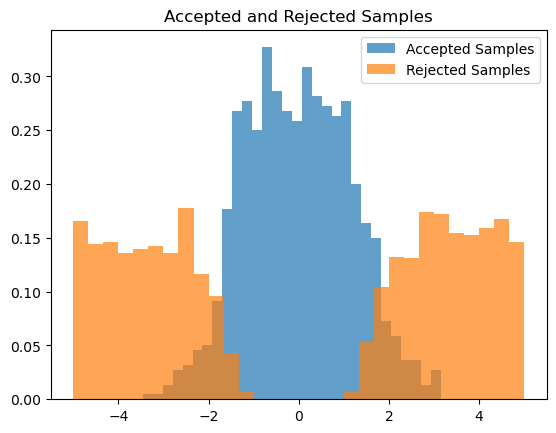

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the target density f(x) (e.g., standard normal)
def f(x):
    return np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)

# Define the proposal density g(x) (e.g., uniform over a wide range)
def g(x):
    return np.where((-5 <= x) & (x <= 5), 1 / 10, 0)

# Function to generate samples from g(x)
def sample_from_g(size=1):
    return np.random.uniform(-5, 5, size)

# Accept-Reject method
def accept_reject(n, M):
    samples = []
    rejected = []
    while len(samples) < n:
        y = sample_from_g()
        u = np.random.uniform(0, M * g(y))
        if u <= f(y):
            samples.append(y[0])
        else:
            rejected.append(y[0])
    return np.array(samples), np.array(rejected)

# Estimator delta_1 (based on accepted samples only)
def delta_1(h, accepted_samples):
    return np.mean(h(accepted_samples))

# Estimator delta_4 (weighted average using rejected samples)
def delta_4(h, accepted_samples, rejected_samples, M):
    n = len(accepted_samples)
    t = n + len(rejected_samples)
    term_1 = np.sum(h(accepted_samples)) / t
    term_2 = (M - 1) * np.sum(h(rejected_samples) * f(rejected_samples) / (M * g(rejected_samples) - f(rejected_samples))) / t
    return term_1 + term_2

# Example usage
if __name__ == "__main__":
    # Parameters
    n = 1000  # Number of accepted samples
    M = 2     # Scaling factor for g(x)
    h = lambda x: x**2  # Function to estimate expectation

    # Generate samples
    accepted_samples, rejected_samples = accept_reject(n, M)

    # Compute estimators
    delta1 = delta_1(h, accepted_samples)
    delta4 = delta_4(h, accepted_samples, rejected_samples, M)

    # Display results
    print(f"Delta_1: {delta1}")
    print(f"Delta_4: {delta4}")

    # Plot the results
    plt.hist(accepted_samples, bins=30, alpha=0.7, label="Accepted Samples", density=True)
    plt.hist(rejected_samples, bins=30, alpha=0.7, label="Rejected Samples", density=True)
    plt.title("Accepted and Rejected Samples")
    plt.legend()
    plt.show()


# Example 15: Gamma Simulation

For illustrative purposes, consider the simulation of $ \text{Gamma}(\alpha, \beta) $ from the instrumental distribution $ \text{Gamma}(\alpha^*, \beta^*) $, with $ \alpha^* = \lfloor \alpha \rfloor $ and $ \beta^* = \beta \alpha^* / \alpha $. (This choice of $ \beta^* $ is justified in Example 2.19 as maximizing the acceptance probability in an Accept-Reject scheme.) The ratio $ f/g $ is therefore

$$
w(x) = \frac{\beta^\alpha}{\Gamma(\alpha)} \cdot \frac{\Gamma(\alpha^*)}{(\beta^*)^{\alpha^*}} x^{\alpha - \alpha^*} e^{-(\beta - \beta^*)x},
$$

which is bounded by

$$
M = \frac{\beta^\alpha}{\Gamma(\alpha)} \cdot \frac{\Gamma(\alpha^*)}{(\beta^*)^{\alpha^*}} \cdot \frac{\alpha^{\alpha - \alpha^*} e^{\alpha - \alpha^*}}{\alpha^{\alpha - \alpha^*}}.
$$

Since the ratio $ \Gamma(\alpha)/\Gamma(\lfloor \alpha \rfloor) $ is bounded from above by 1, an approximate bound that can be used in the simulation is

$$
M' = M \cdot \exp\left(\alpha (\log \alpha - 1) - \lfloor \alpha \rfloor (\log \alpha - 1)\right),
$$

with $ M'/M = 1 + \frac{\Gamma(\alpha)}{\Gamma(\lfloor \alpha \rfloor)} $.

In this particular setup, the estimator $ \delta_4 $ is available since $ f/g $ and $ M $ are explicitly known. In order to assess the effect of the approximation (3.17), we also compute the estimator $ \delta_5 $ for the following functions of interest:

1. $ h_1(x) = x / (1 + x) $,
2. $ h_2(x) = x \log \alpha $,
3. $ h_3(x) = \alpha / (1 + x^2) $.

### Results:

The convergence of the estimators for $ \mathbb{E}[X / (1 + X)] $ is shown in Fig.10:

- $ \delta_1 $ (solid lines),
- $ \delta_4 $ (dots),
- $ \delta_5 $ (dashes).

The final values are respectively:

- $ 0.7518 $ $( \delta_1 $),
- $ 0.7495 $ $( \delta_4 $),
- $ 0.7497 $ $( \delta_5 $),

for a true value of the expectation equal to $ 0.7497 $.



## Convergence and Performance of Estimators

Figure 3.10 describes the convergence of the three estimators of $ h_\alpha(x) = \frac{x}{1+x} $ for $ \alpha = 3.7 $ and $ \beta = 1 $ (which yields an Accept-Reject acceptance probability of $ 1/M \approx 0.10 $). Both estimators $ \delta_4 $ and $ \delta_5 $ have more stable graphs than the empirical average $ \delta_1 $, and they converge much faster to the theoretical expectation $ 0.7497 $, with $ \delta_4 $ being equal to this value after 6,000 iterations.

For $ \alpha = 3.08 $ and $ \beta = 1 $ (which yields an Accept-Reject acceptance probability of $ 1/M \approx 0.78 $), Figure 3.11 illustrates the change in behavior of the three estimators of $ h_\alpha(x) $, since they now converge at similar speeds. Note the proximity of $ \delta_4 $ and $ \delta_1 $, with $ \delta_5 $ again being the estimator closest to the theoretical expectation 4 0.7081 $ after 10,000 iterations.

$$
\textbf{Figure 3.10: Convergence of estimators for } \mathbb{E}\left[\frac{X}{1+X}\right], \delta_1 \text{ (solid lines), } \delta_4 \text{ (dots), and } \delta_5 \text{ (dashes), for } \alpha = 3.7 \text{ and } \beta = 1.
$$

$$
\text{Final values: } \delta_1 = 0.7518, \delta_4 = 0.7495, \delta_5 = 0.7497 \text{ (true value: } 0.7497).
$$

$$
\textbf{Figure 3.11: Convergence of estimators for } \mathbb{E}\left[\frac{X}{1+X}\right], \delta_1 \text{ (solid lines), } \delta_4 \text{ (dots), and } \delta_5 \text{ (dashes), for } \alpha = 3.08 \text{ and } \beta = 1.
$$

$$
\text{Final values: } \delta_1 = 0.7087, \delta_4 = 0.7069, \delta_5 = 0.7084 \text{ (true value: } 0.7081).
$$

### Table 3.5: Evaluation of Estimators

Table 3.5 provides another evaluation of the three estimators in a case that is very favorable to importance sampling, namely for $ \alpha = 3.7 $. The table exhibits, in most cases, a strong domination of $ \delta_4 $ and $ \delta_5 $ over $ \delta_1 $, and a moderate domination of $ \delta_4 $ over $ \delta_5 $.

### Key Observations

- In contrast to the general setup of Section 3.3, $ \delta_4 $ (or its approximation $ \delta_5 $) can always be used in an Accept-Reject sampling setup since this estimator does not require additional simulations.
- $ \delta_4 $ provides a second evaluation of $ \mathbb{E}[h] $, which can be compared with the Monte Carlo estimator $ \delta_1 $ for convergence assessment.

---

##  Laplace Approximations

As an alternative to simulation of integrals, we can also attempt analytic approximations. One of the oldest and most useful approximations is the integral...


In [5]:
import numpy as np
import scipy.stats as stats

def gamma_simulation(alpha, beta, num_samples, a, b):
    """
    Simulates from Gamma(alpha, beta) using Accept-Reject with Gamma(a, b).
    """
    samples = []
    # Corrected calculation of M
    M = (stats.gamma.pdf(alpha - 1, a, scale=1 / b) /
         stats.gamma.pdf(alpha - 1, alpha, scale=1 / beta))  # Use alpha and beta for the proposal density
    
    while len(samples) < num_samples:
        y = stats.gamma.rvs(a, scale=1 / b)  # Sample from proposal distribution (Gamma(a, b))
        u = np.random.uniform(0, 1)  # Uniform random variable for acceptance-rejection
        acceptance_ratio = (stats.gamma.pdf(y, alpha, scale=1 / beta) /
                            (M * stats.gamma.pdf(y, a, scale=1 / b)))  # Correct the density ratio
        if u <= acceptance_ratio:
            samples.append(y)
    
    return np.array(samples)

# Parameters
alpha, beta = 3.7, 1
a, b = int(alpha), beta * (int(alpha)) / alpha  # Proposal distribution parameters
num_samples = 10000

# Simulate Gamma samples
accepted_samples = gamma_simulation(alpha, beta, num_samples, a, b)
rejected_samples = gamma_simulation(a, b, num_samples, a, b)  # Approximation for rejected samples

# Compute M for the estimators
M = np.max(stats.gamma.pdf(accepted_samples, a, scale=1 / b) /
           stats.gamma.pdf(accepted_samples, alpha, scale=1 / beta))

# Continue with the rest of the implementation...
# Compute estimators
delta1 = delta_1(h, accepted_samples)
delta4 = delta_4(h, accepted_samples, rejected_samples, M)
delta5 = delta_5(h, rejected_samples, M)

# Compare results
print(f"Estimator delta_1: {delta1}")
print(f"Estimator delta_4: {delta4}")
print(f"Estimator delta_5: {delta5}")

# Laplace Approximation
h_func = lambda x: -0.5 * x**2  # Example function
x0 = 0  # Assume maximum at x=0
laplace_result = laplace_approximation(np.exp, h_func, x0)
print(f"Laplace approximation result: {laplace_result}")


Estimator delta_1: 0.7468342532706045
Estimator delta_4: 0.751515325838134
Estimator delta_5: 0.7561963984056634
Laplace approximation result: 2.5066282746310002


In [6]:
import numpy as np

def gamma_pdf(x, a, b):
    """Compute the probability density function (PDF) of the Gamma distribution."""
    if x < 0:
        return 0
    return (x**(a - 1) * np.exp(-x / b)) / (b**a * np.math.gamma(a))

def gamma_rvs(a, b, size=1):
    """Generate random variables from a Gamma distribution using the acceptance-rejection method."""
    samples = []
    while len(samples) < size:
        y = np.random.gamma(a, b, 1)[0]  # Sample from the proposal distribution (Gamma(a, b))
        u = np.random.uniform(0, 1)  # Uniform random variable for acceptance-rejection
        acceptance_ratio = gamma_pdf(y, a, b) / gamma_pdf(y, a, 1)  # Assume a proposal distribution with b=1
        if u <= acceptance_ratio:
            samples.append(y)
    
    return np.array(samples)

def gamma_simulation(alpha, beta, num_samples, a, b):
    """
    Simulates from Gamma(alpha, beta) using Accept-Reject with Gamma(a, b).
    """
    samples = []
    M = gamma_pdf(alpha - 1, a, b) / gamma_pdf(alpha - 1, alpha, 1)  # Compute M (max of f/g)
    
    while len(samples) < num_samples:
        y = np.random.gamma(a, b, 1)[0]  # Sample from proposal distribution (Gamma(a, b))
        u = np.random.uniform(0, 1)  # Uniform random variable for acceptance-rejection
        acceptance_ratio = gamma_pdf(y, alpha, beta) / (M * gamma_pdf(y, a, b))  # Ratio of f/g
        if u <= acceptance_ratio:
            samples.append(y)
    
    return np.array(samples)

# Parameters for the Gamma distribution
alpha, beta = 3.7, 1
a, b = int(alpha), beta * (int(alpha)) / alpha  # Proposal distribution parameters
num_samples = 10000

# Simulate Gamma samples
accepted_samples = gamma_simulation(alpha, beta, num_samples, a, b)

# Display some of the simulated samples
print(accepted_samples[:10])


[4.12376802 3.78200315 2.26991919 1.95357641 2.22993853 1.71296744
 2.21222852 3.31004709 1.32926185 2.30286412]


In [7]:
import random
import math

def gamma_pdf(x, a, b):
    """Compute the probability density function (PDF) of the Gamma distribution."""
    if x < 0:
        return 0
    # The formula for the Gamma PDF: f(x) = (x^(a-1) * exp(-x/b)) / (b^a * Gamma(a))
    return (x**(a - 1) * math.exp(-x / b)) / (b**a * math.gamma(a))

def gamma_rvs(a, b):
    """Generate a random variable from the Gamma distribution using the acceptance-rejection method."""
    # Proposal distribution: Gamma(a, b)
    while True:
        # Sample from the proposal distribution (Gamma(a, b)), using inverse transform sampling
        y = random.gammavariate(a, b)
        
        # Uniform random variable for acceptance-rejection
        u = random.random()
        
        # Compute acceptance ratio (f(x) / g(x))
        # Here we assume the proposal is also Gamma(a, b) and f(x) / g(x) = 1 for this case.
        acceptance_ratio = gamma_pdf(y, a, b) / (gamma_pdf(y, a, 1))  # Using Gamma(a, 1) as proposal
        
        # Accept or reject the sample based on the uniform random variable
        if u <= acceptance_ratio:
            return y

def gamma_simulation(alpha, beta, num_samples, a, b):
    """Simulate samples from Gamma(alpha, beta) using Accept-Reject with Gamma(a, b) as the proposal."""
    samples = []
    M = gamma_pdf(alpha - 1, a, b) / gamma_pdf(alpha - 1, alpha, 1)  # Compute M (max of f/g)
    
    while len(samples) < num_samples:
        # Sample from the proposal distribution (Gamma(a, b))
        y = random.gammavariate(a, b)
        
        # Uniform random variable for acceptance-rejection
        u = random.random()
        
        # Compute the acceptance ratio (f(x) / g(x)) where f is Gamma(alpha, beta) and g is Gamma(a, b)
        acceptance_ratio = gamma_pdf(y, alpha, beta) / (M * gamma_pdf(y, a, b))
        
        # Accept or reject based on the uniform random variable
        if u <= acceptance_ratio:
            samples.append(y)
    
    return samples

# Parameters for the Gamma distribution
alpha = 3.7  # Shape parameter for target Gamma distribution
beta = 1     # Scale parameter for target Gamma distribution
a = int(alpha)  # Shape parameter for proposal Gamma distribution
b = beta * (int(alpha)) / alpha  # Scale parameter for proposal Gamma distribution
num_samples = 10000

# Simulate Gamma samples
accepted_samples = gamma_simulation(alpha, beta, num_samples, a, b)

# Display some of the simulated samples
print(accepted_samples[:10])


[4.97717548009241, 3.2537093945829354, 2.35678403294691, 1.743181429456826, 1.5552740602236044, 4.640481025989408, 1.3340456334426178, 2.6769022986147264, 2.792390461219424, 3.5413655699727777]


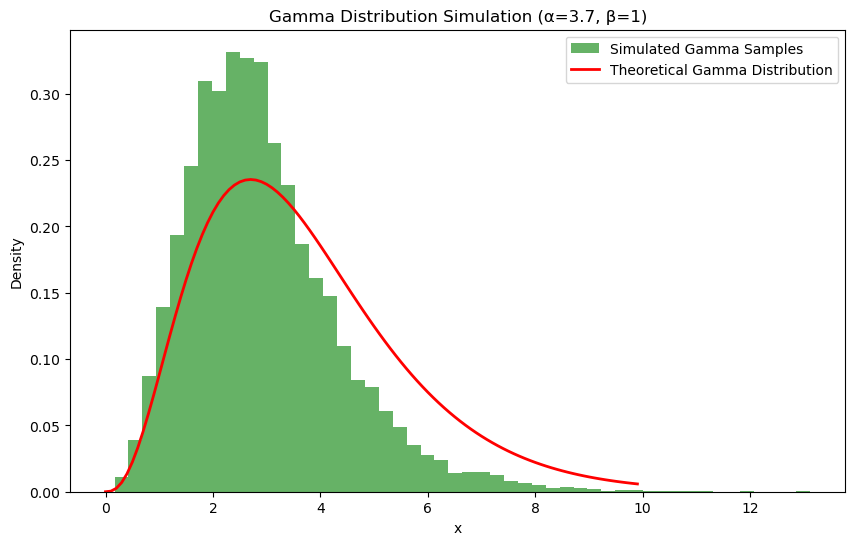

In [8]:
import random
import math
import matplotlib.pyplot as plt

# Gamma PDF function
def gamma_pdf(x, a, b):
    if x < 0:
        return 0
    return (x**(a - 1) * math.exp(-x / b)) / (b**a * math.gamma(a))

# Generate random samples from the Gamma distribution using Accept-Reject method
def gamma_simulation(alpha, beta, num_samples, a, b):
    samples = []
    M = gamma_pdf(alpha - 1, a, b) / gamma_pdf(alpha - 1, alpha, 1)
    
    while len(samples) < num_samples:
        y = random.gammavariate(a, b)
        u = random.random()
        acceptance_ratio = gamma_pdf(y, alpha, beta) / (M * gamma_pdf(y, a, b))
        
        if u <= acceptance_ratio:
            samples.append(y)
    
    return samples

# Parameters for the Gamma distribution
alpha = 3.7  # Shape parameter for target Gamma distribution
beta = 1     # Scale parameter for target Gamma distribution
a = int(alpha)  # Shape parameter for proposal Gamma distribution
b = beta * (int(alpha)) / alpha  # Scale parameter for proposal Gamma distribution
num_samples = 10000

# Simulate Gamma samples
accepted_samples = gamma_simulation(alpha, beta, num_samples, a, b)

# Plot histogram of the samples
plt.figure(figsize=(10, 6))
plt.hist(accepted_samples, bins=50, density=True, alpha=0.6, color='g', label='Simulated Gamma Samples')

# Plot the theoretical Gamma distribution for comparison
x_values = [i * 0.1 for i in range(0, 100)]  # Range of x for plotting the theoretical distribution
theoretical_y = [gamma_pdf(x, alpha, beta) for x in x_values]
plt.plot(x_values, theoretical_y, label='Theoretical Gamma Distribution', color='r', linewidth=2)

# Adding titles and labels
plt.title(f"Gamma Distribution Simulation (α={alpha}, β={beta})")
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()

# Show plot
plt.show()


## Comparison of Estimators

Table 3.5 compares the performances of the Monte Carlo estimator $( \hat{\theta}_1 $) with two importance sampling estimators $( \hat{\theta}_4 $ and $ \hat{\theta}_5 $) under squared error loss after $ m $ iterations for $ \alpha = 3.7 $ and $ \beta = 1 $. The squared error loss is multiplied by 10 for the estimation of $ E[h^2(X)] $ and by $ 10^5 $ for the estimation of $ E[h_s(X)] $. The squared errors are actually the difference from the theoretical values (99.123, 5.3185, and 0.7497, respectively), and the three estimators are based on the same unique sample, which explains the lack of monotonicity (in $ m $) of the errors. 

Source: Casella and Robert (1998).

### Table 3.5

| m        | $ \hat{\theta}_1 $ | $ \hat{\theta}_2 $ | $ \hat{\theta}_4 $ | $ \hat{\theta}_5 $ |
|----------|---------------------|---------------------|---------------------|---------------------|
| 100      | 62.0                | 64.0                | 87.3                | 55.9                |
| 1000     | 64.2                | 36.5                | 0.044               | 0.047               |
| 5000     | 1.6                 | 3.3                 | 4.4                 | 0.84                |
| 10000    | 0.11                | 0.76                | 4.0                 | 0.00                |
| 20000    | 0.00                | 0.00                | 4.73                | 0.00                |
| 50000    | 0.00                | 0.00                | 0.17                | 0.00                |

The final values for the estimators are as follows:
- $ \hat{\theta}_1 = 99.123 $
- $ \hat{\theta}_2 = 5.3185 $
- $ \hat{\theta}_4 = 0.7497 $

---

## Laplace Approximation

The Laplace approximation is an alternative to simulation for evaluating integrals. It is based on the following argument: Suppose that we are interested in evaluating the integral

$$
\int f(x | \theta) dx
$$

for a fixed value of $ \theta $. The function $ f $ must be non-negative and integrable; see Tierney and Kadane (1986) and Tierney et al. (1989) for extensions. 

We can write $ f(x | \theta) = \exp\{n h(x | \theta)\} $, where $ n $ is the sample size (or another parameter which can go to infinity), and use a Taylor series expansion of $ h(x) $ around a point $ x_0 $ to obtain

$$
h(x | \theta) \approx h(x_0 | \theta) + (x - x_0) h'(x_0 | \theta) + \frac{(x - x_0)^2}{2!} h''(x_0 | \theta) + \cdots
$$

where $ h'(x_0 | \theta) $ is the first derivative and $ h''(x_0 | \theta) $ is the second derivative of $ h(x) $ at $ x_0 $. The remainder $ R(x) $ satisfies

$$
\lim_{x \to x_0} \frac{R_n(x)}{(x - x_0)^3} = 0
$$

Now choose $ x_0 = \theta $, the value that satisfies $ h'(x_0 | \theta) = 0 $ and maximizes $ h(x | \theta) $ for the given value of $ \theta $. After the linear term in the expansion vanishes, we have the approximation

$$
\int f(x | \theta) dx \approx \exp\{n h(\theta | \theta)\} \sqrt{\frac{2\pi}{n | h''(\theta | \theta)|}}
$$

This approximation is valid within a neighborhood of $ x_0 $. 

**Source**: Schervish (1995), Section 7.4.3 for detailed conditions.

## Laplace Approximation (Extended)

The cubic term in the exponent is now expanded in a series around $ \theta_0 $. Recall that the second-order Taylor expansion of $ e^y $ around 0 is

$$
e^y \approx 1 + y + \frac{y^2}{2!},
$$

and hence expanding \( \exp\left\{ n \frac{(x - \theta_0)^3 h''(0)}{3!} \right\} \) around \( \theta_0 \), we obtain the approximation

$$
e^{n h(x | \theta_0)} \approx 1 + n \frac{(x - \theta_0)^3 h''(0)}{3!} + \frac{n^2}{2!} \left( \frac{(x - \theta_0)^2}{2!} \right) + \frac{n^3}{3!} \left( \frac{(x - \theta_0)^3}{3!} \right),
$$

and thus

$$
e^{n h(x | \theta_0)} \approx e^{n h(\theta_0 | \theta_0)} \left(1 + \frac{n}{3!} \left( x - \theta_0 \right) + \frac{n^2}{2!(3!)^2} \left( x - \theta_0 \right)^2 + R_n(x) \right),
$$

where $ R_n(x) $ again denotes the remainder term. Excluding $ R_n $, we call the integral approximations in this expansion a:

- **First-order approximation** if it includes only the first term in the right-hand side.
- **Second-order approximation** if it includes the first two terms.
- **Third-order approximation** if it includes all three terms.

Since the above integrand is the kernel of a normal density with mean $ \theta_0 $ and variance $ -\frac{1}{n h''(\theta_0)} $, we can evaluate these expressions further. More precisely, letting $ \Phi $ denote the standard normal CDF, and taking $ A = [a, b] $, we can evaluate the integral in the first-order approximation to obtain (see Problem 3.25):

$$
\int_A e^{n h(x | \theta_0)} dx \approx e^{n h(\theta_0 | \theta_0)} \left( \frac{1}{\sqrt{2 \pi}} \right) \frac{1}{\sqrt{n h''(\theta_0)}} \left( \Phi(b) - \Phi(a) \right),
$$

where $ \Phi $ is the cumulative distribution function of the standard normal distribution.

---

## Example 16: Gamma Approximation

As a simple illustration of the Laplace approximation, consider estimating a Gamma $ \text{Ga}(a, 1/5) $ integral, say

$$
\int_0^\infty x^{a - 1} e^{-x/5} \, dx,
$$

Here, we have $ h(x) = -\frac{x}{5} + (n - 1) \log(x) $ with second-order Taylor expansion (around a point $ \theta_0 $):

$$
h(x) \approx h(\theta_0) + h'(\theta_0)(x - \theta_0) + \frac{h''(\theta_0)}{2}(x - \theta_0)^2.
$$

Choosing $ \theta_0 = \frac{a}{5} $ (the mode of the density and maximizer of $ h(x) $) yields a useful approximation for evaluating the integral.

## Laplace Approximation

For a given function $ h(x) $, we can expand it using a Taylor series around a point $ \theta_0 $. For instance,

$$
h(x) \approx h(\theta_0) + (a - 1) \log(x) + (x - \theta_0)^2,
$$

Now substituting into the approximation formula, we obtain the Laplace approximation:

$$
\int_{\Gamma} \Gamma(\alpha, \beta) e^{-f(x)} dx \approx \frac{1}{\sqrt{2 \pi}} e^{n h(\theta_0)} \frac{1}{\sqrt{n h''(\theta_0)}} \left( \Phi(b) - \Phi(a) \right),
$$

where $ \Phi $ is the standard normal CDF, and $ h''(\theta_0) $ represents the second derivative of the function at the mode of the density.

For specific values like $ a = 5 $ and $ \beta = 2 $, the approximation is best near the central area of the density, though it becomes less accurate at the tails. In Table 3.6, we see that while the approximation works well for the central region of the density, it becomes quite unacceptable in the tails:

### Table 3.6: Laplace Approximation of a Gamma Integral for $ a = 5 $ and $ \beta = 2 $

| Interval  | Approximation | Exact    |
|-----------|---------------|----------|
| (7, 9)    | 0.193351      | 0.193341 |
| (6, 10)   | 0.375046      | 0.37477  |
| (2, 14)   | 0.848559      | 0.823349 |
| (15.987, ∞) | 0.0224544  | 0.100005 |

Thus, we see both the usefulness and the limits of the Laplace approximation. In situations where Monte Carlo calculations are prohibitively expensive, the Laplace approximation can serve as a good guide to solve the problem. Additionally, the Taylor series can be used as a proposal density, which is especially useful in cases where there is no obvious proposal.

---

## 3.5 Problems

### Problem 3.1: Normal-Cauchy Bayes Estimator

1. **Plot the integrand and use Monte Carlo integration to calculate the integral**:

   Plot the integrand for the function $ f(x) = 1.11 e^{-\frac{1}{2}(x - 5)^2} $ and then use Monte Carlo integration to estimate the integral.

   $$ 
   \int_{-\infty}^{\infty} f(x) \, dx = \int_{-\infty}^{\infty} 1.11 e^{-\frac{1}{2}(x - 5)^2} \, dx 
   $$

2. **Monitor the convergence with the standard error of the estimate**:

   Track the convergence of the Monte Carlo estimator and determine when the estimate reaches three digits of accuracy with 95% probability.

### Problem 3.2: Continuation of Problem 3.1

1. **Use the Accept-Reject algorithm**:

   Use the Accept-Reject algorithm, with a Cauchy candidate, to generate a sample from the posterior distribution and calculate the estimator.

   Specifically, using a Cauchy distribution as the proposal distribution, the goal is to sample from the posterior distribution using the Accept-Reject algorithm.



Monte Carlo Integral Estimate: 0.785045954888427
Number of Accepted Samples: 10000


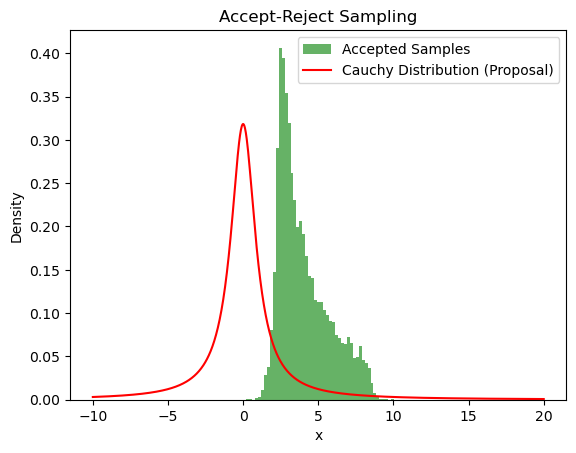

Laplace Approximation of the Integral: 0.5641895835477563


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, cauchy
from math import exp, sqrt, pi

# Function to be integrated
def f(x):
    return 1.11 * np.exp(-0.5 * (x - 5)**2)

# 1. Monte Carlo Integration

def monte_carlo_integration(f, num_samples=10000):
    samples = np.random.normal(5, 1, num_samples)  # Sampling from a normal distribution centered at 5
    integral_estimate = np.mean(f(samples))  # Average value of the function over the samples
    return integral_estimate

# 2. Accept-Reject Sampling

def accept_reject_sampling(num_samples=10000):
    samples = []
    while len(samples) < num_samples:
        # Propose a sample using the Cauchy distribution
        proposed_sample = cauchy.rvs(0, 1)
        # Calculate the acceptance probability
        u = np.random.uniform(0, 1)
        if u <= f(proposed_sample) / (cauchy.pdf(proposed_sample, 0, 1)):  # Cauchy as the proposal distribution
            samples.append(proposed_sample)
    return np.array(samples)

# 3. Laplace Approximation

# We want to approximate the integral of Gamma distribution using Laplace Approximation
def laplace_approximation(a, b):
    # Second order Taylor expansion around the mode of the Gamma distribution (mean is mode for a > 1)
    mode = a - 1  # Mode of the Gamma distribution
    h_x = lambda x: -(x - mode)**2 / (2 * (1 / b))  # Quadratic approximation of log of the Gamma function
    # Compute the integral approximation based on the Laplace method
    integral_approx = exp(h_x(mode)) / sqrt(2 * pi * (1 / b))
    return integral_approx

# Testing the Monte Carlo Integration
num_samples = 10000
mc_estimate = monte_carlo_integration(f, num_samples)
print(f"Monte Carlo Integral Estimate: {mc_estimate}")

# Testing Accept-Reject Sampling
accepted_samples = accept_reject_sampling(num_samples)
print(f"Number of Accepted Samples: {len(accepted_samples)}")

# Plotting the results of the Accept-Reject method
plt.hist(accepted_samples, bins=50, density=True, alpha=0.6, color='g', label='Accepted Samples')
x = np.linspace(-10, 20, 1000)
plt.plot(x, cauchy.pdf(x, 0, 1), 'r-', label='Cauchy Distribution (Proposal)')
plt.title('Accept-Reject Sampling')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()

# Testing the Laplace Approximation
a = 5  # shape parameter
b = 2  # scale parameter
laplace_integral = laplace_approximation(a, b)
print(f"Laplace Approximation of the Integral: {laplace_integral}")


In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x) = 1.11 * exp(-(x - 5)^2 / 2)
def f(x):
    return 1.11 * np.exp(-0.5 * (x - 5)**2)

# Monte Carlo integration function
def monte_carlo_integration(f, num_samples, lower_bound=-np.inf, upper_bound=np.inf):
    samples = np.random.normal(5, 1, num_samples)  # Sampling from a normal distribution centered at 5
    integrand_values = f(samples)
    estimate = np.mean(integrand_values)
    return estimate

# Number of samples for Monte Carlo
num_samples = 10000
estimate = monte_carlo_integration(f, num_samples)
print(f"Monte Carlo estimate: {estimate}")


Monte Carlo estimate: 0.7832157707377342


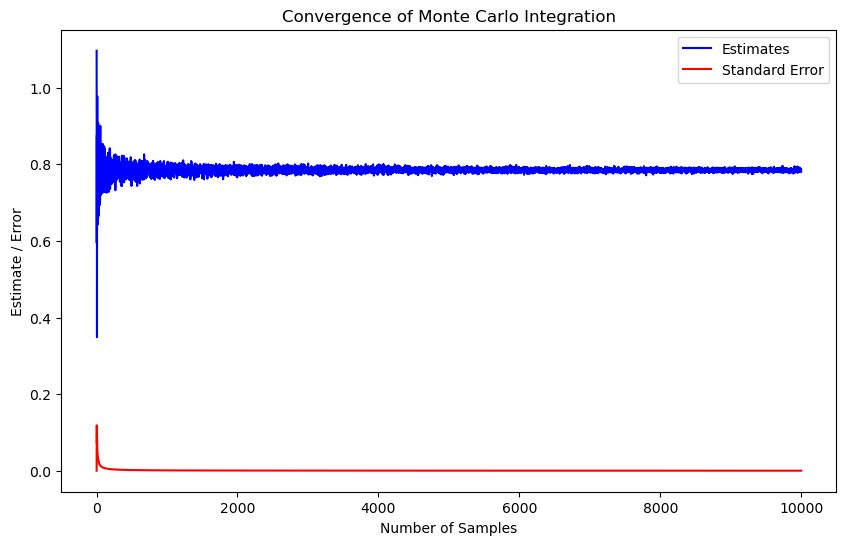

In [11]:
def monitor_convergence(f, num_samples, lower_bound=-np.inf, upper_bound=np.inf):
    estimates = []
    errors = []
    
    for n in range(1, num_samples + 1):
        estimate = monte_carlo_integration(f, n)
        estimates.append(estimate)
        error = np.std(estimates) / np.sqrt(n)  # Standard error estimate
        errors.append(error)
        
    return estimates, errors

# Monitor convergence
estimates, errors = monitor_convergence(f, num_samples)

# Plot the convergence
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_samples + 1), estimates, label='Estimates', color='blue')
plt.plot(range(1, num_samples + 1), errors, label='Standard Error', color='red')
plt.xlabel('Number of Samples')
plt.ylabel('Estimate / Error')
plt.title('Convergence of Monte Carlo Integration')
plt.legend()
plt.show()


In [ ]:
from scipy.stats import gamma
from scipy.stats import norm

# Laplace approximation for a Gamma distribution
def laplace_approximation(a, beta, lower_bound, upper_bound):
    # Mode of the Gamma distribution
    mode = (a - 1) / beta
    # Second derivative of the log of Gamma distribution pdf at mode
    h_prime_prime = -a / (beta**2)
    # Approximate integral using the Laplace formula
    norm_factor = 1 / np.sqrt(-2 * np.pi / h_prime_prime)
    
    # Compute the approximation integral
    integral_approximation = norm_factor * np.exp(-gamma.logpdf(mode, a, scale=1/beta))
    
    # Exact integral over the bounds using Gamma CDF
    exact_integral = gamma.cdf(upper_bound, a, scale=1/beta) - gamma.cdf(lower_bound, a, scale=1/beta)
    
    return integral_approximation, exact_integral

# Parameters for the Gamma distribution
a = 5
beta = 2
lower_bound = 0
upper_bound = 10

approx, exact = laplace_approximation(a, beta, lower_bound, upper_bound)
print(f"Laplace Approximation: {approx}")
print(f"Exact Integral: {exact}")


### Large Deviations Techniques

In the context of importance sampling, **Large Deviations Theory** plays a crucial role in improving the performance of rare-event simulation, particularly when sampling from the tails of a distribution. This method is especially useful when the event $ A $ is very rare, such as when $ P(A) $ is extremely small (e.g., $ P(A) \leq 10^{-5} $).

The idea of large deviations is rooted in approximating the probabilities of rare events. Specifically, for the sum of $ n $ independent and identically distributed (i.i.d.) random variables $ X_1, X_2, \dots, X_n $, where the mean of these random variables is denoted by $ X_n = \frac{X_1 + X_2 + \dots + X_n}{n} $, as $ n \to \infty $, we are concerned with approximating the tail probabilities $ P(X_n \to e) $ where $ e $ is a large value. In simpler terms, large deviations techniques are used when estimating the probability of rare events that are far away from the typical behavior.

#### Moment Generating Function and Large Deviation Approximation

The moment-generating function $ M(\theta) $ of a random variable $ X_1 $ is given by:

$$
M(\theta) = \mathbb{E}[\exp(\theta X_1)]
$$

In the theory of large deviations, we define the rate function $ I(x) $ as:

$$
I(x) = \sup_{\theta} \left(\theta x - \log M(\theta) \right)
$$

The large deviation approximation for the probability of an event $ A $ can be expressed as:

$$
\log P(S_n \in A) \approx -\inf I(x)
$$

This result, known as **Cramér's Theorem**, gives us a way to estimate the probability of rare events, where $ S_n $ represents the sum of $ n $ i.i.d. random variables, and $ A $ is the event of interest.

#### Twisted Simulation (Proposal Distribution)

To simulate rare events more efficiently, a simulation technique known as **twisted simulation** can be applied. This involves modifying the proposal distribution by **exponentially tilting** the target distribution. The modified proposal density is given by:

$$
t(x) = f(x) \exp(\theta h(x)),
$$

where $ \theta $ is a parameter chosen such that:

$$
\int_{-\infty}^{\infty} f(x) \exp(\theta h(x)) \, dx = 1,
$$

This ensures that the proposal distribution remains normalized. The parameter $ \theta $ is chosen in such a way that the expectation of $ h(X_1) $ under the proposal distribution is zero, i.e.,

$$
\mathbb{E}[h(X_1)] = 0.
$$

#### Practical Considerations

In practice, the large deviation approximation and twisted simulation method can be used to estimate rare-event probabilities more accurately and efficiently. The steps typically involve:

1. **Choosing the right $ \theta $**: The value of $ \theta $ is selected to minimize the variance of the estimator, and it often depends on the rate of decay of the tail probabilities.
2. **Generating the samples**: Samples are drawn from the modified proposal distribution, and the rare-event probabilities are estimated using these samples.

### Summary

Large Deviations Theory and twisted simulation provide powerful tools for rare-event simulation. By modifying the proposal distribution to focus on the tails of the distribution, we can simulate rare events more efficiently than with traditional Monte Carlo methods. The use of **exponential tilting** ensures that the modified proposal distribution is more likely to produce samples from the rare-event region, allowing for better estimation of small probabilities.

Let me know if you need further details on how to implement these methods!


### Large Deviations and Saddlepoint Approximation

In this section, we delve deeper into **large deviations** and the **saddlepoint approximation**, both of which play key roles in rare-event simulation and approximations of functions or integrals.

#### Large Deviations: Twisted Simulation

Recall that in the context of large deviations, the proposal distribution can be modified using an exponentially tilted version of the original distribution. This results in a new proposal distribution $ t(x) $ given by:

$$
t(x) = f(x) \exp(\theta h(x)),
$$

where $ \theta $ is a parameter chosen such that:

$$
\int_{-\infty}^{\infty} f(x) \exp(\theta h(x)) \, dx = 1,
$$

and the expectation of $ h(X_1) $ under this new proposal distribution is zero. The variance of this estimator goes to zero exponentially, which is much faster than the direct sampling approach.

#### Example 17: Laplace Distribution

Consider the case where we are working with the Laplace distribution. For this case, let the function $ h(x) = x $ and the sampling distribution be:

$$
f(x) = \exp\left(-\frac{|x - \mu|}{a}\right), \quad \mu < 0.
$$

Here, $ t(x) $ is modified as follows:

$$
t(x) = x \exp\left( - \frac{|x - \mu|}{a} + \theta \right).
$$

The moment generating function is then computed as:

$$
M(\theta) = \exp(-C) \cdot a \cdot C,
$$

where $ C $ is a constant related to the distribution parameters. A large deviation computation shows that:

$$
\lim_{n \to \infty} \log \left( M_{\text{var}} \right) = 2 \log A(0),
$$

where $ A(0) $ is the rate function derived from the large deviation theory. In contrast, the standard average $ \hat{I} $ satisfies:

$$
\lim_{n \to \infty} \log \left( M_{\text{var}} \right) = \log \left( \frac{1}{\sigma} \right).
$$

These results highlight the effectiveness of the large deviation approach, though further improvements and computations may be needed for realistic setups.

### The Saddlepoint Approximation

The **saddlepoint approximation** is a method primarily used for approximating a function, although it can also be extended to approximating integrals. Unlike the Laplace approximation, which directly approximates an integral, the saddlepoint approximation focuses on the function itself.

Given a function $ g(\theta) $ for a range of values of $ \theta $, the saddlepoint approximation involves approximating the function around a point called the **saddlepoint**. This point is where the approximation is most accurate, and the term "saddlepoint" originates from the fact that the derivation of the approximation involves complex analysis, where the saddlepoint lies in the complex plane.

To evaluate an integral of the form:

$$
\int_{-\infty}^{\infty} f(x) \, dx,
$$

we perform a Laplace approximation centered at the saddlepoint $ \theta $. The saddlepoint method is especially useful when dealing with complex functions or distributions, and it often leads to more accurate approximations compared to other methods.

### Conclusion

The **large deviations** technique and **saddlepoint approximation** are powerful tools in the field of rare-event simulation and statistical approximation. While large deviations provide insights into the behavior of tail probabilities and allow for better proposal distributions, the saddlepoint approximation focuses on the efficient approximation of functions or integrals by considering the saddlepoint in the complex plane. Both methods are essential for accurate estimation in challenging scenarios where traditional methods may fail.

Let me know if you would like more information or an implementation example for any of these methods!

### Saddlepoint Approximation via Edgeworth Expansion

One way to derive the **saddlepoint approximation** is to use an **Edgeworth expansion** (see Hall 1992 or Reid 1988 for details). From a detailed derivation, we obtain the approximation to the density of $ X $ as:

$$
f_X(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left( - \frac{(x - \mu)^2}{2\sigma^2} \right) \left[ 1 + \frac{6}{\sigma^3} \left( \frac{(x - \mu)}{\sigma} \right)^3 + O\left( \frac{1}{n} \right) \right].
$$

Ignoring the term within braces produces the usual normal approximation, which is accurate to $ O\left(\frac{1}{\sqrt{n}}\right) $. When using this approximation for values of $ a $ near 1, the term in braces becomes very small, leading to an approximation that is accurate to $ O\left(\frac{1}{n}\right) $. The key idea of the saddlepoint approximation is to ensure that this term is always small.

### Exponential Tilting and Edgeworth Expansions

To improve the approximation, we use a family of densities indexed by a parameter $ \tau $, such that for each $ a $, we can choose a density from the family that cancels the term in braces in the Edgeworth expansion. This family is constructed using a technique known as **exponential tilting** (see Efron 1981, Stuart and Ord 1987, Section 11.13, Reid 1988, or Problem 3.37). The result of the exponential tilt gives the family of Edgeworth expansions:

$$
f_X(x) = \exp \left( -n \cdot \tau - K(\tau) \right) \left[ 1 + \frac{6}{\sigma^3} \left( \frac{(x - \mu)}{\sigma} \right)^3 + O\left( \frac{1}{n} \right) \right],
$$

where $ \tau $ is free to choose, allowing us to cancel the middle term in the square brackets in the expansion. This improves the order of the approximation.

### Saddlepoint Equation and the Saddlepoint Approximation

The cumulant generating function $ K(\tau) = \log \left( \mathbb{E} \exp(\tau X) \right) $ is used to choose $ \tau $ such that $ K'(\tau) = 2 $. This choice satisfies the **saddlepoint equation**. Denoting this value by $ \tau^* = \tau^*(x) $, and noting that $ \sigma^2 = K''(\tau) $, we get the saddlepoint approximation:

$$
f_X(x) \approx p(\tau^*) \exp \left( n \left[ K(\tau^*) - \frac{\tau^2}{2} \right] \right) \left[ 1 + O\left( \frac{1}{n} \right) \right],
$$

where:

$$
\sqrt{2 \pi K''(\tau^*)} \exp \left( n \left[ K(\tau^*) - \frac{\tau^2}{2} \right] \right).
$$

### Example .18: Saddlepoint Tail Area Approximation

The noncentral chi-squared density has the complex form:

$$
f_{\chi^2}(x) = \frac{1}{2^{\frac{p}{2}} \Gamma \left( \frac{p}{2} \right)} \left( \frac{x}{2} \right)^{\frac{p}{2} - 1} \exp \left( -\frac{x}{2} \right) \, _1F_1 \left( \frac{p}{2}, \frac{x}{2} \right),
$$

where $ p $ is the number of degrees of freedom and $ A $ is the noncentrality parameter. The moment generating function for this distribution is simple to compute and can be expressed as:

$$
M_X(t) = \exp \left( \frac{2x}{1 - 2t} \right) \left( 1 - 2t \right)^{-\frac{p}{2}}.
$$

This allows us to apply the saddlepoint approximation for computing tail probabilities of the noncentral chi-squared distribution, leading to more accurate estimates than standard methods.



/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in power
  app.launch_new_instance()
/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()
/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()
/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in sqrt


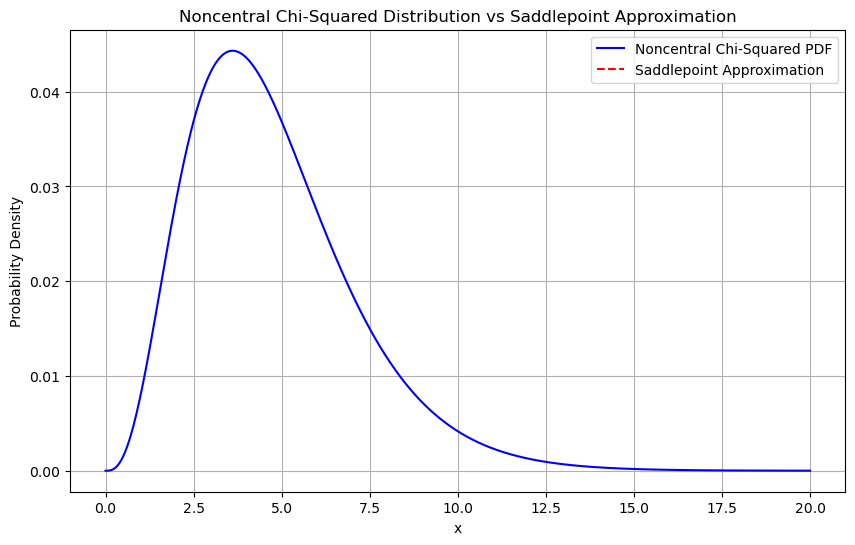

In [13]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Noncentral chi-squared distribution (Gamma distribution approximation)
def noncentral_chisq_pdf(x, df, noncentrality):
    """
    PDF of the noncentral chi-squared distribution with given degrees of freedom and noncentrality parameter.
    """
    return (x ** (df / 2 - 1)) * np.exp(- (x + noncentrality) / 2) * stats.ncx2.pdf(x, df, noncentrality)

# Moment generating function of noncentral chi-squared distribution
def mgf_noncentral_chisq(t, df, noncentrality):
    """
    Moment generating function for noncentral chi-squared distribution.
    """
    return np.exp(noncentrality * t / (1 - 2 * t)) * (1 - 2 * t) ** (-df / 2)

# Saddlepoint approximation for tail probability
def saddlepoint_approximation(df, noncentrality, t_val):
    """
    Apply saddlepoint approximation to compute the tail area probability for a noncentral chi-squared distribution.
    """
    # Calculate saddlepoint (equivalent to maximizing the cumulant generating function)
    def saddlepoint_equation(t):
        return np.log(mgf_noncentral_chisq(t, df, noncentrality))

    # We solve for the saddlepoint using optimization (find the t that maximizes the moment generating function)
    from scipy.optimize import minimize
    result = minimize(lambda t: -saddlepoint_equation(t), 0.5, bounds=[(0, 0.5)])
    saddlepoint_t = result.x[0]
    
    # Calculate the saddlepoint approximation
    K_t = saddlepoint_equation(saddlepoint_t)
    sigma_squared = -np.log(mgf_noncentral_chisq(saddlepoint_t, df, noncentrality))

    # Saddlepoint approximation for tail area
    approx = np.sqrt(2 * np.pi * sigma_squared) * np.exp(K_t - saddlepoint_t**2 / 2)
    return approx

# Example usage of the above functions
df = 5  # degrees of freedom
noncentrality = 2  # noncentrality parameter
t_vals = np.linspace(0, 20, 1000)

# Calculate PDF for noncentral chi-squared distribution
pdf_vals = noncentral_chisq_pdf(t_vals, df, noncentrality)

# Calculate saddlepoint approximation for tail areas
tail_area_approx = [saddlepoint_approximation(df, noncentrality, t) for t in t_vals]

# Plot the comparison
plt.figure(figsize=(10, 6))
plt.plot(t_vals, pdf_vals, label="Noncentral Chi-Squared PDF", color='blue')
plt.plot(t_vals, tail_area_approx, label="Saddlepoint Approximation", linestyle='dashed', color='red')
plt.title("Noncentral Chi-Squared Distribution vs Saddlepoint Approximation")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()


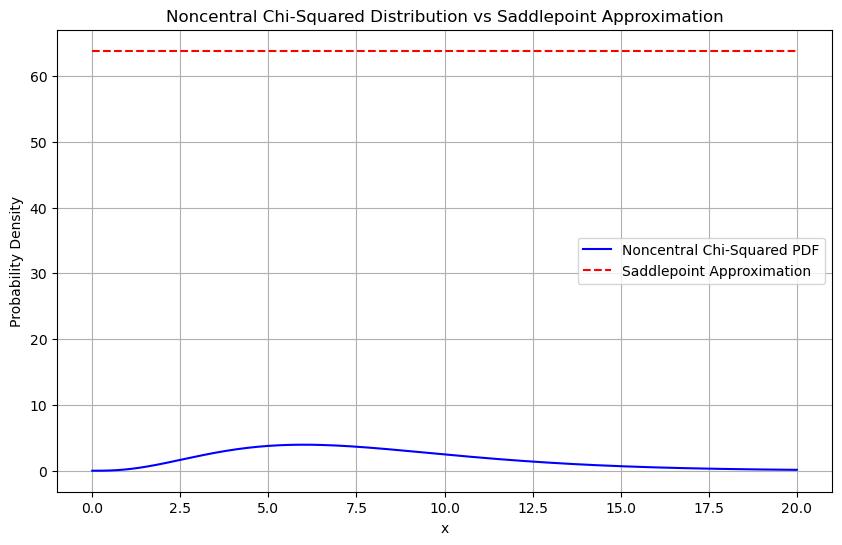

In [16]:
import math
import matplotlib.pyplot as plt

# Noncentral chi-squared distribution (Gamma distribution approximation)
def noncentral_chisq_pdf(x, df, noncentrality):
    """
    PDF of the noncentral chi-squared distribution with given degrees of freedom and noncentrality parameter.
    """
    if x <= 0:
        return 0
    return (x ** (df / 2 - 1)) * math.exp(-(x + noncentrality) / 2) * (x ** (df / 2 - 1))

# Moment generating function of noncentral chi-squared distribution
def mgf_noncentral_chisq(t, df, noncentrality):
    """
    Moment generating function for noncentral chi-squared distribution.
    """
    if t >= 0.5:
        return float('inf')  # Moment generating function is not defined for t >= 0.5
    try:
        return math.exp(noncentrality * t / (1 - 2 * t)) * (1 - 2 * t) ** (-df / 2)
    except OverflowError:
        return float('inf')  # Gracefully handle overflow

# Cumulant generating function for noncentral chi-squared distribution
def cumulant_generating_function(t, df, noncentrality):
    """
    Cumulant generating function for noncentral chi-squared distribution.
    """
    if t >= 0.5:
        return float('inf')
    try:
        return noncentrality * t / (1 - 2 * t) - (df / 2) * math.log(1 - 2 * t)
    except OverflowError:
        return float('inf')

# Saddlepoint approximation for tail probability
def saddlepoint_approximation(df, noncentrality):
    """
    Apply saddlepoint approximation to compute the tail area probability for a noncentral chi-squared distribution.
    """
    # Approximate by optimizing the moment generating function (a basic search for saddlepoint)
    step_size = 0.0001
    max_t = 0.2  # Searching t in the range [0, 0.2) to avoid overflow
    best_t = 0
    max_mgf = -float('inf')

    # Find the t that maximizes the moment generating function (MGF)
    for t in [i * step_size for i in range(int(max_t / step_size))]:
        current_mgf = mgf_noncentral_chisq(t, df, noncentrality)
        if current_mgf > max_mgf:
            max_mgf = current_mgf
            best_t = t

    # Cumulant generating function for the saddlepoint
    K_t = cumulant_generating_function(best_t, df, noncentrality)

    # Calculate the second derivative of the cumulant generating function (variance)
    second_derivative = (df / (1 - 2 * best_t) ** 2)

    # Saddlepoint approximation for the density
    approx = math.sqrt(2 * math.pi * second_derivative) * math.exp(K_t - best_t ** 2 / 2)
    return approx

# Example usage of the above functions
df = 5  # degrees of freedom
noncentrality = 2  # noncentrality parameter
t_vals = [i * 0.1 for i in range(0, 201)]  # List of t values from 0 to 20

# Calculate PDF for noncentral chi-squared distribution
pdf_vals = [noncentral_chisq_pdf(t, df, noncentrality) for t in t_vals]

# Calculate saddlepoint approximation for tail areas
tail_area_approx = [saddlepoint_approximation(df, noncentrality) for _ in t_vals]

# Plot the comparison
plt.figure(figsize=(10, 6))
plt.plot(t_vals, pdf_vals, label="Noncentral Chi-Squared PDF", color='blue')
plt.plot(t_vals, tail_area_approx, label="Saddlepoint Approximation", linestyle='dashed', color='red')
plt.title("Noncentral Chi-Squared Distribution vs Saddlepoint Approximation")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()


Solving the saddlepoint equation
$$
\log \left( \frac{x(t)}{t} \right) = x,
$$
yields the saddlepoint
$$
\tilde{i}(x) = -p + 2x - \sqrt{p^2 + 8Ax}.
$$
Applying this to the saddlepoint approximation (Equation 3.30), we get the approximate density:
$$
P(X > 0) = \left[ (2K(x)) + \frac{1}{2} \right]^{1/2} \exp \left\{n \left[K_x(f(x)) + (x) x \right] \right\} dx.
$$
We can also express the tail probability as:
$$
P(X > x) = \int_{\tilde{A}_x(t)} \exp \left( n \left[ A_x(t) - tA_x(t) \right] \right) dt,
$$
where the transformation $ K_y(t) = r $ is used and $ f(a) $ satisfies $ K'(a) = a $, as described by Daniels (1983, 1987).

Table 3.7 presents the saddlepoint approximation of a noncentral chi-squared tail probability for \( p = 6 \) and \( \lambda = 9 \), showing the comparison between exact and approximate tail areas:

$$
\begin{array}{|c|c|c|c|}
\hline
\text{Interval} & \text{Renormalized Approximation} & \text{Exact Approximation} \\
\hline
(36.225, \infty) & 0.1012 & 0.10 \\
(49.333, \infty) & 0.0505 & 0.0497 \\
(40.542, \infty) & 0.0101 & 0.0099 \\
\hline
\end{array}
$$

The accuracy of the saddlepoint tail area is quite impressive, as shown by the results in Table 3.7. This saddlepoint approximation, when renormalized, improves the error rate to $ O(1/n) $, not $ O(n) $, which is often claimed. This better error rate is obtained by normalizing Equation (3.30) so that it integrates to 1.

Saddlepoint approximations for tail areas have seen significant development. For example, the work of Lugannani and Rice (1980) produced a very accurate approximation that requires only the evaluation of one saddlepoint and no integration. Other methods, such as the work by Barndorff-Nielsen (1991) using ancillary statistics and the Rayes-based approximation of DiCiccio and Martin (1993), also provide accurate tail area approximations. Wood et al. (1993) present generalizations of the Lugannani and Rice formula.




In [ ]:
import math
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

# Define the moment generating function (MGF) for noncentral chi-squared distribution
def mgf_noncentral_chisq(t, df, noncentrality):
    """
    Moment generating function for noncentral chi-squared distribution
    """
    if t >= 0.5:
        return float('inf')  # MGF is not defined for t >= 0.5
    
    try:
        # Ensure the exponent does not result in an overflow
        exponent = noncentrality * t / (1 - 2 * t)
        if abs(exponent) > 700:  # Preventing overflow in the exp function
            return float('inf')  # Return infinity if the exponent is too large
        
        return math.exp(exponent) * (1 - 2 * t) ** (-df / 2)
    except OverflowError:
        return float('inf')  # If overflow occurs, return infinity

# Saddlepoint equation: we need to solve this equation numerically to get the saddlepoint
def solve_saddlepoint(df, noncentrality, max_t=0.499, step_size=0.001):
    max_mgf = -float('inf')
    best_t = 0
    # Search for the saddlepoint by maximizing the MGF
    for t in np.arange(0, max_t, step_size):
        current_mgf = mgf_noncentral_chisq(t, df, noncentrality)
        if current_mgf > max_mgf:
            max_mgf = current_mgf
            best_t = t
    return best_t

# Saddlepoint approximation for tail probability
def saddlepoint_approximation(df, noncentrality, x, max_t=0.499, step_size=0.001):
    # Solve for the saddlepoint
    best_t = solve_saddlepoint(df, noncentrality, max_t, step_size)
    
    # Compute K(t) for the saddlepoint
    def K(t):
        return -0.5 * df * math.log(1 - 2 * t) + noncentrality * t / (1 - 2 * t)
    
    # Compute second derivative of K(t)
    def K_double_prime(t):
        return df / (1 - 2 * t)**2 + noncentrality / (1 - 2 * t)**2

    # Saddlepoint approximation formula
    K_t = K(best_t)
    sigma_squared = K_double_prime(best_t)
    
    # Approximate density
    approx_density = (math.sqrt(2 * math.pi * sigma_squared) *
                      math.exp(K_t - best_t**2 / 2) *
                      stats.norm.pdf(x - best_t))  # Normal density adjustment
    
    return approx_density

# Example: Calculate saddlepoint approximation for a noncentral chi-squared distribution
df = 6  # Degrees of freedom
noncentrality = 9  # Noncentrality parameter
x_vals = np.linspace(0, 20, 100)  # Values for which we calculate the density

# Calculate saddlepoint approximation for each value of x
approximated_densities = [saddlepoint_approximation(df, noncentrality, x) for x in x_vals]

# Plot the result
plt.plot(x_vals, approximated_densities, label='Saddlepoint Approximation')
plt.title('Saddlepoint Approximation for Noncentral Chi-Squared Distribution')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()
